In [4]:
######################################################################################################################
###################################### Data Visualization in Python ##################################################
######################################################################################################################

In [4]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import plotly.express as px

In [ ]:
# Matplotlib (or Seaborn (created on top of Matplotlib ; like a wrapper))
# plotly (Very Classy !)

In [ ]:
################################################ Data  ###############################################################

In [5]:
os.getcwd()

'/Users/manpreetsi/My Python Jupyter Notebook'

In [6]:
mydata = pd.read_csv("train.csv")

In [7]:
mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
## Adding "Not_Survived" column
mydata.loc[mydata.Survived==0,'Not_Survived']=1
mydata.loc[mydata.Survived==1,'Not_Survived']=0

In [11]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Not_Survived  891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [12]:
mydata[['Survived','Not_Survived']].head()

,Survived,Not_Survived
0,0,1.0
1,1,0.0
2,1,0.0
3,1,0.0
4,0,1.0


In [ ]:
######################################################################################################################
################################################# Matplotlib #########################################################
######################################################################################################################
    '''
    Bar Graph
    Pie Chart
    Box Plot
    Histogram
    Line Chart and Subplots
    Scatter Plot
    '''

In [ ]:
################################################# Bar Graph ##########################################################

In [47]:
### Using Pivot
pivot=pd.pivot_table(data=mydata,values='Survived', aggfunc=np.sum,index='Sex')

In [161]:
pivot

,Survived
Sex,
female,233
male,109


In [160]:
pivot.index

Index(['female', 'male'], dtype='object', name='Sex')

<BarContainer object of 2 artists>

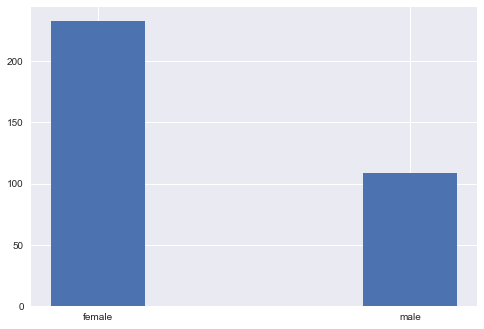

In [187]:
plt.bar(pivot.index,pivot['Survived'],width=0.3) ## This show femamles have higher survival rate

In [120]:
pivot_2 = pd.pivot_table(data=mydata,values='Fare',index='Pclass',aggfunc=np.mean)

In [121]:
pivot_2

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


Text(0.5, 1.0, 'Average Fare per Pclass')

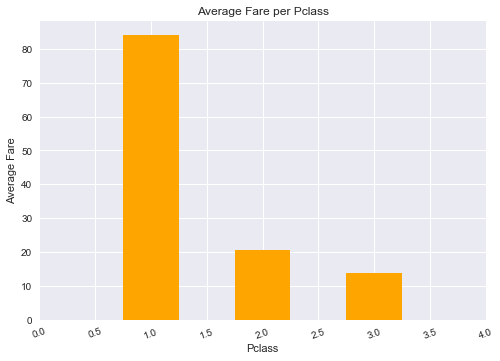

In [122]:
plt.bar(pivot_2.index,pivot_2['Fare'],color='orange',width=0.5);
plt.xticks(rotation=20)
plt.xlim([0,4])
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.title('Average Fare per Pclass')

In [ ]:
################################################# Pie Chart ##########################################################

In [ ]:
## Pie chart of percentage share of passengers per Pclass

In [250]:
share={}
total = mydata['Pclass'].value_counts().sum()
for i in range (0,len(mydata['Pclass'].value_counts())):
    x = mydata['Pclass'].value_counts().index[i]
    count = mydata[mydata.Pclass==x]['PassengerId'].count()
    share["Pclass: " +str(x)]=count/total

In [251]:
share

{'Pclass: 3': 0.5510662177328844,
 'Pclass: 1': 0.24242424242424243,
 'Pclass: 2': 0.20650953984287318}

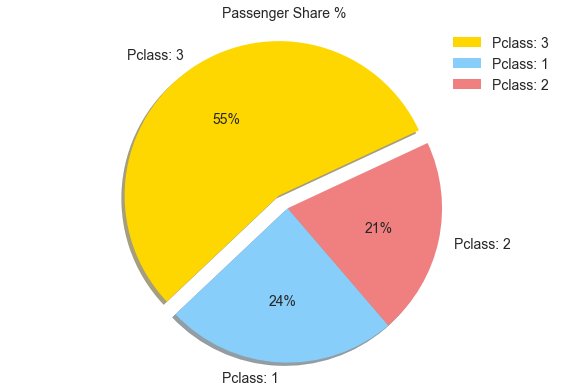

In [285]:
## values & labels for pie chart
val = [ x*100 for x in share.values()] 
lab = [x for x in share.keys()] 

## pie chart 
plt.pie(val,labels = lab,
        autopct='%0.0f%%',explode=[.1,0,0],startangle=25,textprops={'fontsize': 14},
        colors=['gold','lightskyblue','lightcoral'],shadow=True);
plt.title('Passenger Share %',fontsize=14) ;
plt.tight_layout();
plt.axis('equal');
plt.legend(loc=1,prop={'size':14})

In [286]:
################################################# Box Plot ###########################################################
##It is useful for detecting outliers within each group.

In [ ]:
## Understand outlier of fare in each Pclass

In [21]:
## With creating a subset
pclass_fare={}
for i in range (0,len(mydata['Pclass'].value_counts())):
    x = mydata['Pclass'].value_counts().index[i]
    pclass_fare[x] = mydata[mydata.Pclass == x ]['Fare']

Text(0, 0.5, 'Fare')

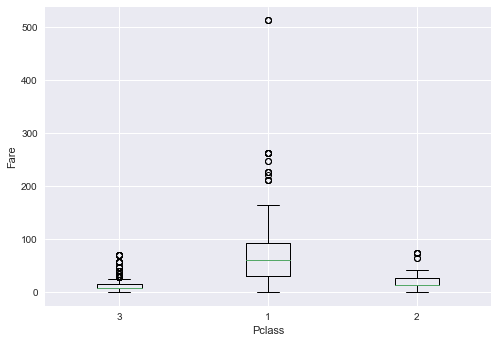

In [35]:
plt.boxplot([x for x in pclass_fare.values()],labels=[x for x in pclass_fare.keys()]);
plt.xlabel('Pclass')
plt.ylabel('Fare')

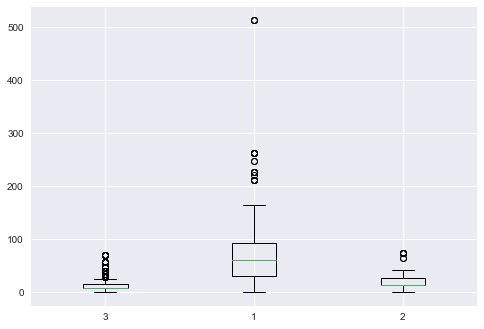

In [48]:
## Without creating a subset
plt.boxplot([mydata[mydata.Pclass==i]['Fare'] for i in mydata['Pclass'].value_counts().index],
            labels=[ i for i in  mydata['Pclass'].value_counts().index]);

In [49]:
################################################# Histogram ##########################################################
# use of axes class from matplotlib to beautify the plot 

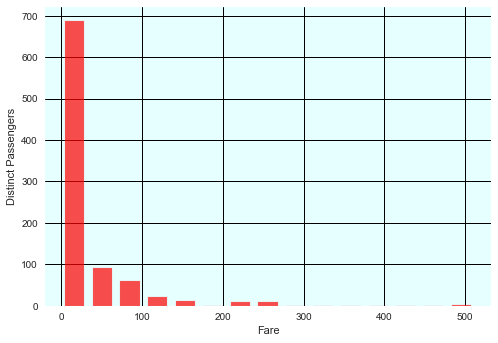

In [116]:
## fig is used mostly to savw the image
fig, ax = plt.subplots(nrows=1, ncols=1);
ax.set_facecolor((.9,1,1)); ## RedGreenBlue
ax.grid('both',color='black',which='both');
plt.hist(mydata['Fare'],rwidth=.7,bins=15,alpha=0.7,color='red',edgecolor='lightcoral');
plt.xlabel("Fare");
plt.ylabel("Distinct Passengers");
fig.savefig('yourfilename.png')

In [ ]:
################################################ Line Chartts ########################################################

In [ ]:
## Check relation bewtween age and fare

In [144]:
## Fill NA age by median Age
mydata['Age'].fillna(mydata['Age'].median(),inplace=True)

In [145]:
mydata.sort_values(by='Age',ascending=True)[['Age','Fare']]

,Age,Fare
803,0.42,8.5167
755,0.67,14.5000
644,0.75,19.2583
469,0.75,19.2583
831,0.83,18.7500
...,...,...
116,70.50,7.7500
96,71.00,34.6542
493,71.00,49.5042
851,74.00,7.7750


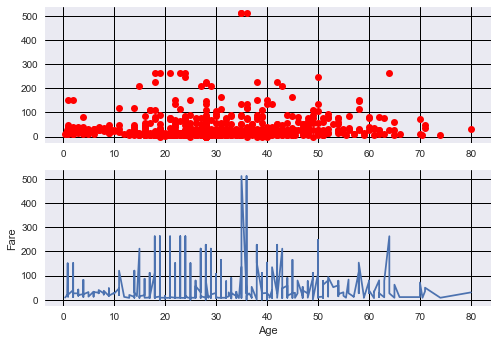

In [150]:
fig,ax = plt.subplots(nrows=2,ncols=1);
ax[0].plot(mydata.sort_values(by='Age',ascending=True)['Age'],mydata.sort_values(by='Age',ascending=True)['Fare'],'ro');
ax[0].grid('both',color='black');

ax[1].plot(mydata.sort_values(by='Age',ascending=True)['Age'],mydata.sort_values(by='Age',ascending=True)['Fare']);
ax[1].grid('both',color='black');

plt.xlabel('Age');
plt.ylabel('Fare');


In [ ]:
################################################ Scatter Plot ########################################################

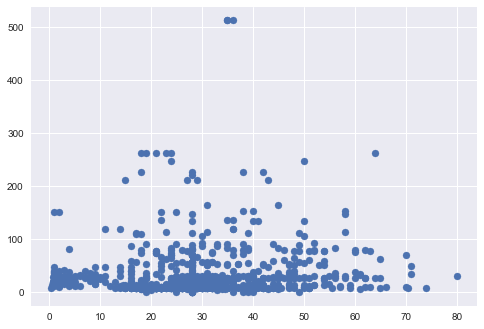

In [152]:
plt.scatter(mydata.sort_values(by='Age',ascending=True)['Age'],mydata.sort_values(by='Age',ascending=True)['Fare']);

In [ ]:
######################################################################################################################
################################################# Plotly #########################################################
######################################################################################################################

#1. Plotly has more number of plot options
#2. Better visualization and graphics
#3. Better and advanced editing/styling option
#4. Shortcuts like cut,save as png, zoom etc. on 1 click.

In [ ]:
################################################ Bar Chart ########################################################

In [48]:
pivot_survived=pivot.copy()
pivot_survived['Sex']=list(pivot.index)

In [49]:
pivot_survived.index = range(0,len(pivot_survived))
pivot_survived

,Survived,Sex
0,233,female
1,109,male


In [86]:
## Vertical
fig = px.bar(pivot_survived,x='Sex',y='Survived',color='Sex', height = 500)
fig.update_layout(xaxis_title='Sex',yaxis_title='Survival Sum',title='Gender vs Suvival Sum').show();


In [93]:
## Horizontal
fig = px.bar(pivot_survived,x='Survived',y='Sex',color='Sex', height = 500,orientation='h')
fig.update_layout(xaxis_title='Survival Sum',yaxis_title='Sex',title='Gender vs Suvival Sum').show();


In [ ]:
######################################## Grouped & Stacked Bar Chart #################################################

In [33]:
pivot_not_survived = pd.pivot_table(mydata,values='Not_Survived',index='Sex',aggfunc=np.sum)

In [42]:
pivot_not_survived['Sex']=list(pivot_not_survived.index)
pivot_not_survived.index = range(0,len(pivot_not_survived))
pivot_not_survived

,Not_Survived,Sex
0,81.0,female
1,468.0,male


In [52]:
pivot_total = pd.merge(pivot_survived,pivot_not_survived,on='Sex',how='inner')
pivot_total

,Survived,Sex,Not_Survived
0,233,female,81.0
1,109,male,468.0


In [53]:
import plotly.graph_objects as go

In [90]:
fig = go.Figure(data=[
            go.Bar(name='Total Survivals',x=pivot_total['Sex'],y=pivot_total['Survived'],offsetgroup=0),
            go.Bar(name='Total Died',x=pivot_total['Sex'],y=pivot_total['Not_Survived'],offsetgroup=1)
          ])
fig.update_layout(barmode='group',title='Gender Relation with Survival Rate', yaxis_title='No. of Passengers',xaxis_title='Sex').show();



In [74]:
fig = go.Figure(data=[
            go.Bar(name='Total Survivals',x=pivot_total['Sex'],y=pivot_total['Survived'],offsetgroup=0),
            go.Bar(name='Total Died',x=pivot_total['Sex'],y=pivot_total['Not_Survived'],offsetgroup=0)
          ])
fig.update_layout(barmode='stack',title='Sex vs Survival', yaxis_title='No. of Passengers',xaxis_title='Sex').show();



In [ ]:
# Let us look at some Advance and different charts than Matplotlib 
# For this purpose I have used inbuilt data of plotly 

In [ ]:
data_plotly=px.data.gapminder()

In [101]:
data_plotly

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [ ]:
############################################# Filled Area Chart ######################################################

In [124]:
fig = px.area(data_plotly,x='year',y='lifeExp',line_group='country',color='continent',hover_name='country')
fig.show()

In [ ]:
################################################ Bubble Chart ########################################################

In [154]:
#Life Expectancy vs gdp per capita for various iso_alpha
fig = px.scatter(data_plotly[data_plotly.year==2007], x="gdpPercap", y="lifeExp",
                 size="pop", 
                 color="iso_alpha",
                 hover_name="country", 
                 size_max=80)
fig.update_layout(yaxis =dict(title='Life Expectancy',gridcolor='white'),
                  xaxis=dict(title='GDP Per Capita',gridcolor='white'),
                  title='Life Expectancy vs GDP per capita for various iso_alpha',
                  paper_bgcolor='rgb(243,243,243)',
                  plot_bgcolor='rgb(500,500,500)')
fig.show()

In [ ]:
########################################### Figure Factory Tables ####################################################

In [155]:
import plotly.figure_factory as ff

In [163]:
fig = ff.create_table(data_plotly[(data_plotly.continent=='Asia') & (data_plotly.country=='India')][['year','pop','gdpPercap']])
fig.show()

In [ ]:
############################################### Funnel Chart #########################################################

In [186]:
data = dict(
    number=[39, 27.4, 20.6, 11, 2],
    stage=["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"])
fig = px.funnel(data, x='number', y='stage',color='number')
fig.update_layout(yaxis=dict(title='Customer Acquisition Stages'),title='Customer Conversion at various stages')
fig.show()

In [182]:
data = dict(
    number=[20, 10, 9, 5, 2],
    stage=["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"])
fig = px.funnel_area(names = data['stage'],values=data['number'])
fig.update_layout(yaxis=dict(title='Customer Acquisition Stages'),title='Customer Conversion at various stages')
fig.show()